____

 <hr color= #884ea0  size=12> 

# <font color='yellow'> <center> Extra Credit Homework </center> </font>


 <hr color=  #884ea0  size=12> 


____

This HW is optional and it can only improve your grade. For every question that you answer correctly, points will be added to your final grade. The way they will be added is that they replace HW points that you missed. For example, if you have a HW with a current grade of 30/50, you can regain those missing 20 points by answering enough questions here - note that each question is marked with how many points it is worth.

This extra credit HW has a total grade of 4.5; with 30 points contribution from HW to overall grade, and 10 HWs, you could easily do the math to see how many points you need from this assignment.

As with other HWs, you are allowed to use your friends and the internet. But, in the end, the answer must be your own. We are extremely good at finding code on the internet and matching Jupyter notebooks!! Put a lot of your own unique code and comments so that you receive full credit. The goal is for **YOU** to learn this material! 

Finally, a small hint: some of the problems might seem long at first. If so, they are likely based on an ICA or HW: grab the solution you produced and start with that to save you some time. There is no need to repeat coding you recently wrote for a HW/ICA.

**Reminder:** Everything for this class is due Friday at midnight, December 9th. If you have any questions about your final grade, let me know before then. We will complete all grading for the class Saturday morning, December 10. 

# Rohan Ponramesh

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal
import numpy as np
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import altair as alt

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 1: Data Wrangling (5pts)</center> </font>
 <hr color="green" size=10> 

 Read in the penguins dataset (e.g., from Seaborn). Find the basic statistics using `Pandas`; in particular, find the means of the four columns that contain measurements. 

Next find the means of these four columns when you group by island. That is, what are the means for each island separately? 

Similarly, what are the means of each measurement grouped by sex? 

Finally, what are the means of each column grouped by sex and then island? That is, given `Female`, what are the means for each island? Similarly, given `Male`, what are the means for each island? What about the reverse? What if I want to know the means for each island, broken down by sex? 

In [134]:
data = sns.load_dataset('penguins')

columns_lst = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
col_means =data[columns_lst].mean()

print(f"Means for  columns:{col_means}")

mean_with_island =data.groupby('island')[columns_lst].mean()

print(f"Mean  grouped by island {mean_with_island}")

mean_by_sex =data.groupby('sex')[columns_lst].mean()

print(f"Mean grouped by sex {mean_by_sex}")

mean_by_sex_and_is =data.groupby(['sex', 'island'])[columns_lst].mean()

print(f"Mean by sex and then island {mean_by_sex_and_is}")

mean_by_island_and_sex =data.groupby(['island','sex'])[columns_lst].mean()

print(f"Mean of island and then sex {mean_by_island_and_sex}")

Means for  columns:bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64
Mean  grouped by island            bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
island                                                                  
Biscoe          45.257485      15.874850         209.706587  4716.017964
Dream           44.167742      18.344355         193.072581  3712.903226
Torgersen       38.950980      18.429412         191.196078  3706.372549
Mean grouped by sex         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
sex                                                                  
Female       42.096970      16.425455         197.363636  3862.272727
Male         45.854762      17.891071         204.505952  4545.684524
Mean by sex and then island                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    island                                  

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 2: Linear Regression (5pts)</center> </font>
 <hr color="green" size=10> 

This problem does not include any coding, just $\LaTeX$ in a markdown cell. 

 You have $N_d\gg2$ data points in 1D that should be modeled by:
 $$y(x) = \sum_{\gamma=1}^2 w_\gamma K(x,x_{c\gamma}).$$
 Note that there are only two terms in this sum; the kernels $K$ are at the centers $x_{c1}$ and $x_{c2}$, which are _not_ at the data points. Assume that any parameters in the kernel $K$ are known so that this is linear in the two weights. 

 * write down an MSE loss function ${\cal L}$ for this problem,
 * minimize the loss function,
 * obtain a formal expression for $w_1$ and $w_2$, (that is, if you can't find an expression of the form $w_1 = \ldots$, then use linear algebra notation),
 * next, solve the problem **without** using a loss function, directly using the data:
  * $y(x_1) = w_1K(x_1,x_{c1}) + w_2K(x_1, x_{c2})$ (at first data point)
  * $y(x_2) = w_1K(x_2,x_{c1}) + w_2K(x_2, x_{c2})$ (at second data point)
  * $\dots$
 * solve this set of equations for the weights and compare to what you got using the loss function; what is different? 
 * numerically, do these two approaches using the matrix inverse, or the Moore-Penrose pseudoinverse? why? 


🤔


*MSE loss function*

$$ MSE = \frac{1}{N} \sum_{j=1}^N (y(x_j)- w_1 K(x_j,x_{c1})-w_2 K(x_j,x_{c2}) )^2 $$

$$ \frac{\partial \mathcal{L}}{\partial w_1} = -\frac{2}{N} \sum_{j=1}^{N} \left(y(x_j) -  w_1 K(x_j,x_{c1})-w_2 K(x_j,x_{c2}))\right) K(x_j, x_{c1}) = 0 $$

$$ \frac{\partial \mathcal{L}}{\partial w_2} = -\frac{2}{N} \sum_{j=1}^{N} \left(y(x_j) -  w_1 K(x_j,x_{c1})-w_2 K(x_j,x_{c2}))\right) K(x_j, x_{c2}) = 0 $$


formal solution can be given by

$$ \mathbf{w} = (\mathbf{K}^T \mathbf{K})^{-1} \mathbf{K}^T \mathbf{y} $$


 $$\mathbf{w} = [w_1, w_2]^T$$  vector of weights,
 
 $$\mathbf{K}$$ kernel matrix,
 $$\mathbf{y}$$ target vector.
 

equations using the provided data points. Given the model:

$$ y(x_j) = w_1K(x_j, x_{c1}) + w_2K(x_j, x_{c2}) $$

We can set up the following system of equations using the data points:

$$ y(x_1) = w_1K(x_1, x_{c1}) + w_2K(x_1, x_{c2}) $$

$$ y(x_2) = w_1K(x_2, x_{c1}) + w_2K(x_2, x_{c2}) $$

$$ \vdots $$

$$ y(x_{N}) = w_1K(x_{N}, x_{c1}) + w_2K(x_{N}, x_{c2}) $$


As a matrix form,

$$ \mathbf{y} = \mathbf{K} \mathbf{w} $$


We can solve for $\mathbf{w}$ using the pseudoinverse of $\mathbf{K}$:

$$ \mathbf{w} = (\mathbf{K}^T \mathbf{K})^{-1} \mathbf{K}^T \mathbf{y} $$


The preference for utilizing the Moore-Penrose pseudoinverse arises from its advantages in numerical stability and versatility in handling various matrix characteristics. It guarantees a dependable solution, especially when dealing with matrices like \(K\) that might pose challenges for the traditional matrix inverse method.

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 3: Visualizing Linear Transformations of Matrices  (5pts)</center> </font>
 <hr color="green" size=10>
 
You are given some data - see the next code cell. The data matrix $X$ is two columns with many rows. 

* make a scatterplot of the raw data,
* multiply the data matrix by a matrix that rotates the data by $45$ degrees, make a new plot, and show the math and code you used,
* multiply the data matrix by a matrix that scales the first column by two, but leaves the second column unscaled; again, show the math+code and a plot,
* multiply $X$ by a matrix that reverses the columns; again, show the equation and illustrate with a plot,
* answer in markdown: in general, what does mulitplication by an orthogonal matrix do? and, in general, what does multiplication by a diagonal matrix do? 
* also answer in markdown: using these ideas, describe in words what the SVD decomposition $X = UΣV^T$ does (in terms of simple matrix operations); that is, how does SVD decompose $X$ into specific operations?  


In [135]:
x=np.array([[ 683,  604,  486,  418,  393,  403,  452,  531,  614,  688,  649,
         595,  526,  477,  452,  472,  526,  590,  644,  747,  801,  801,
         801,  840,  875,  904,  934,  963,  998, 1003, 1003, 1003, 1062,
        1062, 1062, 1062, 1052, 1057, 1003,  973,  944,  904,  870,  845,
         806,  742,  742,  742,  747, 1126, 1155, 1219, 1283, 1318, 1278,
        1219, 1160, 1136, 1160, 1219, 1283, 1327, 1357, 1332, 1278, 1224,
        1195, 1239, 1298, 1352, 1372, 1322, 1263, 1195, 1436, 1504, 1573,
        1632, 1677, 1677, 1632, 1573, 1495, 1495, 1495, 1559, 1613, 1657,
        1652, 1598, 1539, 1490, 1495, 1495, 1549, 1618, 1677, 1677, 1618,
        1554, 1495, 1440, 1440, 1440, 1440, 1440],
       [ 580,  531,  531,  590,  673,  767,  826,  855,  845,  801,  767,
         801,  801,  767,  688,  619,  585,  590,  619,  855,  855,  742,
         639,  693,  737,  777,  732,  688,  634,  683,  757,  850,  855,
         791,  713,  634,  575,  531,  531,  575,  624,  668,  639,  590,
         536,  536,  600,  668,  762,  811,  767,  801,  806,  767,  727,
         708,  688,  614,  560,  531,  536,  550,  570,  609,  590,  585,
         619,  654,  678,  708,  781,  845,  860,  845,  855,  860,  860,
         860,  855,  801,  801,  806,  806,  762,  718,  718,  722,  718,
         668,  668,  663,  663,  624,  585,  585,  585,  585,  531,  531,
         531,  531,  536,  595,  668,  737,  796]])
print(x.shape)

(2, 106)


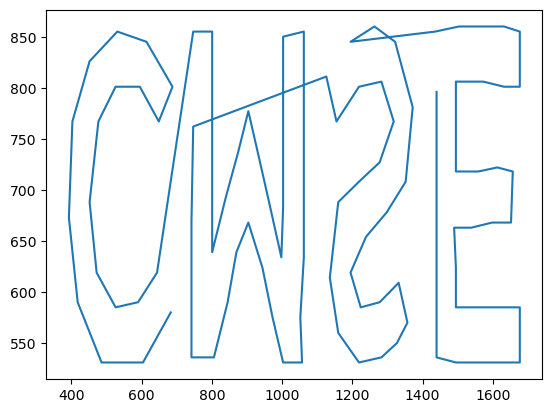

In [136]:
plt.plot(x[0],x[1])

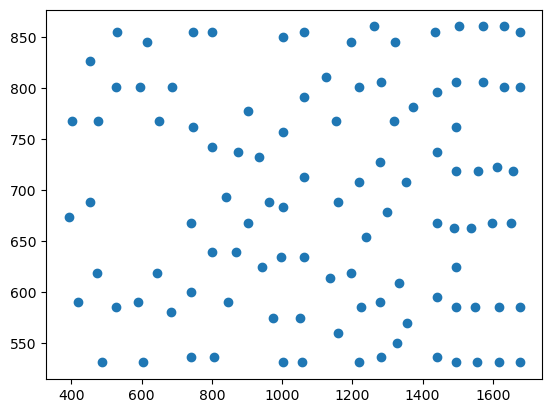

In [137]:
plt.scatter(x[0],x[1])

|

$$X= \begin{bmatrix} 683  & 604  &  486 & ..... \\ 580 &   531 &   531 & ..... \end{bmatrix} $$


$$\begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} $$

For a $\theta= 45 $ , the rotational matrix matrix :


$$R_{45} = \begin{bmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{bmatrix} $$

$$R_{45} = \begin{bmatrix} 0.70710678118 & -0.70710678118 \\ 0.70710678118 & 0.70710678118\end{bmatrix} $$


$$ X_{R45} = \begin{bmatrix} 0.70710678118 & -0.70710678118 \\ 0.70710678118 & 0.70710678118 \end{bmatrix} \begin{bmatrix} 683  & 604  &  486 & ..... \\ 580 &   531 &   531 & ..... \end{bmatrix} $$


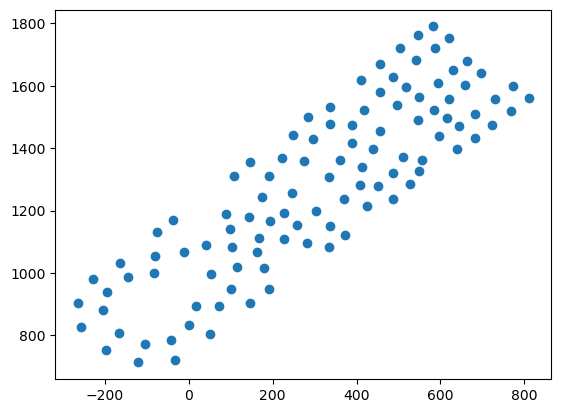

In [138]:
rotational_matrix=np.array([[0.70710678118,-0.70710678118],[0.70710678118,0.70710678118]])

rotated_x= np.dot(rotational_matrix, x)

plt.scatter(rotated_x[0],rotated_x[1])


$$Sclae = \begin{bmatrix} 2 & 0 \\ 0 & 1\end{bmatrix} $$


$$ X_{Sclae} =  \begin{bmatrix} 2 & 0 \\ 0 & 1\end{bmatrix} \begin{bmatrix} 683  & 604  &  486 & ..... \\ 580 &   531 &   531 & ..... \end{bmatrix} $$

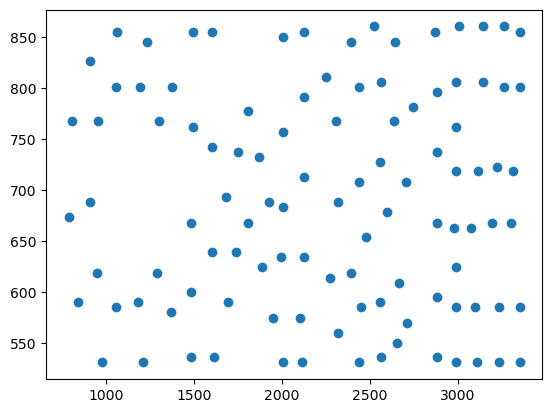

In [139]:
scaling_matrix = np.array([[2, 0],[0, 1]])
scaled_matrix= np.dot(scaling_matrix, x)
plt.scatter(scaled_matrix[0],scaled_matrix[1])


$$Rev = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix} $$


$$ X_{Rev} =  \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix} \begin{bmatrix} 683  & 604  &  486 & ..... \\ 580 &   531 &   531 & ..... \end{bmatrix} $$

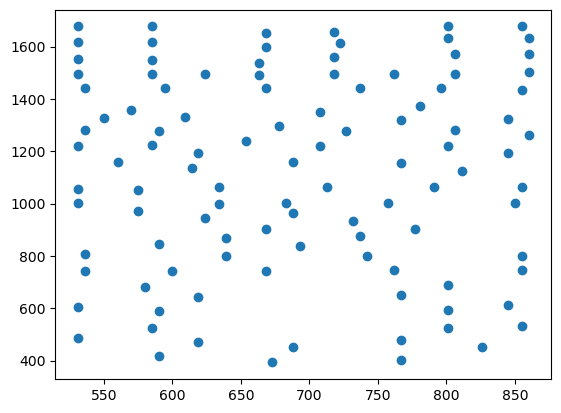

In [140]:
reversing_matrix = np.array([[0, 1],[1, 0]])
reversed_matrix = np.dot(reversing_matrix, x)
plt.scatter(reversed_matrix[0],reversed_matrix[1])


🤔

### Multiplication by an Orthogonal Matrix:

In general, multiplication by an orthogonal matrix preserves the length (magnitude) of vectors and preserves their angles. Specifically:

- **Preservation of Length:** When a vector is multiplied by an orthogonal matrix, its length remains unchanged. The Euclidean norm (magnitude) of the vector before and after multiplication remains the same.
- **Preservation of Angles:** Orthogonal matrices also preserve the angles between vectors. The angle between two vectors before and after multiplication by an orthogonal matrix remains the same.

Orthogonal matrices represent transformations that include rotations, reflections, or compositions of the transformations in n-dimensional spaces.

### Multiplication by a Diagonal Matrix:

Multiplication by a diagonal matrix scales each component of a vector independently. 

- **Scaling of Components:** For a diagonal matrix, each diagonal element represents a scaling factor. When a vector is multiplied by a diagonal matrix, each component of the vector is scaled by the corresponding diagonal element. Elements on the diagonal scale the corresponding components of the vector without affecting other components.
- **Orthogonal Transformation Special Case:** If the diagonal matrix has 1s along the diagonal, it has no effect on the vector since multiplying by 1 leaves values unchanged. However, if diagonal elements differ, they scale vector components accordingly.

Diagonal matrices involve scaling along coordinate axes in multidimensional spaces. They represent transformations that stretch or shrink vectors along the coordinate axes without changing their directions.



SVD is given by

$$ X = U \Sigma V^T $$

Where:
- $U$ is an orthogonal matrix containing the left singular vectors.
- $\Sigma$ is a diagonal matrix containing the singular values.
- $V^T$ is the transpose of an orthogonal matrix $V$ containing the right singular vectors.

In terms of matrix operations, the SVD decomposition performs the following operations:

1. **Rotation and Scaling by $V^T$:**
   - $V^T$ contains the transformation information for $X$.
   - $V^T$ performs rotation operations on the rows of $X$, aligning them along the principal axes of the space.
   - It scales the rows of $X$ independently according to the singular values.

2. **Scaling by $\Sigma$:**
   - $\Sigma$ represents the scaling operations.
   - It scales the columns of the matrix obtained after the rotation by $V^T$ based on the singular values.
   - Larger singular values indicate larger scaling factors, and thus, they contribute more to the transformed matrix.

3. **Rotation by $U$:**
   - $U$ performs rotation operations on the columns of the matrix obtained from the previous steps.
   - It aligns these columns in the new space spanned by the principal directions (corresponding to the right singular vectors).
   - $U$ completes the transformation of the matrix $X$ into a new space where its components are aligned with the principal axes and scaled based on their importance (singular values).

In summary, the SVD decomposition breaks down the original matrix $X$ into three basic operations: rotation and scaling by $V^T$, scaling by $\Sigma$, and rotation by $U$. These operations effectively transform $X$ into a new space where its components are aligned along the principal axes of variation and scaled by their importance represented by the singular values.

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 4: Kernel Density Estimation (5pts)</center> </font>
 <hr color="green" size=10>

On the first day of your job, your boss discusses this task with you: they need to generate random values for their models from a specific distribution function. Unfortunately, they do not know the actual distribution. The company has commissioned a study and some data has recently become available. She asks you to find the distribution using this data. 

Below you find the data, of which there are two sets. 

Which is more appropriate to quickly look at the data, a bar chart or a histogram? Why? Make the appropriate plot with both datasets.

As you look at your plot, you get a sense for what the distribution might look like. Because there are only a few data points, you decide to build a KDE. Plot the data points along the x-axis, again for both datasets, and add a KDE for both. 

Your final plot should have:
* data,
* KDE,
* histogram,
times two because there are two datasets. You want to use good visualization strategies so that the final plot is professional quality. Your boss will use this plot to secure more funding for your future projects, so you need it to be perfect. 

How will you choose the bandwidth for your KDE model?

You want to add good labels for the final visualization, but you don't know what the data is. You walk down the hall asking people and one colleague says that she only knows that it is height data for men and women. Can you figure out which dataset is likely men/women? Can you infer from the data what the units are? 




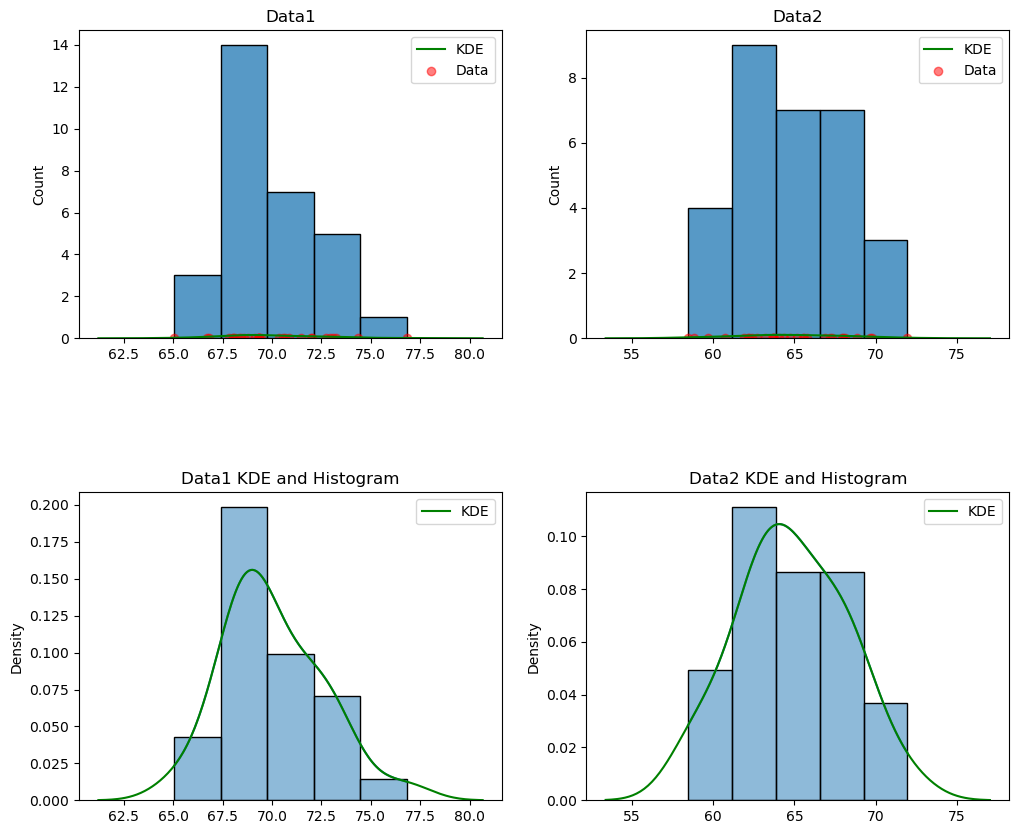

In [141]:
data1 = np.array([73.07579021, 69.45966202, 69.32195519, 76.80911469, 71.48491534,
       66.68192308, 68.58698428, 68.44928269, 69.31647473, 65.06029394,
       67.81171725, 74.37611583, 72.90998157, 70.86788365, 69.13390794,
       72.7334297 , 72.00862579, 68.78190527, 66.80046435, 73.22193731,
       68.01272634, 69.32451075, 69.27696716, 68.13622106, 70.66932059,
       70.56722022, 68.01452347, 68.35089769, 71.99278268, 70.35003476])
data2 = np.array([58.83909564, 66.88909986, 65.58599413, 64.03829777, 62.38208785,
       59.68741396, 68.87242748, 64.71649918, 71.95527685, 62.13635294,
       60.72447014, 65.17233216, 67.94054742, 63.68574382, 62.70041885,
       69.75878539, 58.46048198, 64.38633642, 68.11972338, 67.32723657,
       62.23491212, 63.18485406, 67.99664652, 69.66369611, 65.77758773,
       63.75773525, 61.89245626, 67.19437236, 65.54894867, 63.66279522])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)




def distribution(ax, data, title,isKde,ifScatter=False):
    
    if(isKde):
        sns.histplot(data, kde=isKde, bins=5, ax=ax,stat='density', common_norm=False)
    else:
        sns.histplot(data, kde=isKde, bins=5, ax=ax)
    
    sns.kdeplot(data, ax=ax, label='KDE', color='green')
    if(ifScatter):
        ax.scatter(data, np.zeros_like(data), alpha=0.5, color='red', label='Data')
    ax.set_title(title)
    ax.legend()


distribution(axes[0, 0], data1, 'Data1',False,True)

distribution(axes[0, 1], data2, 'Data2',False,True)

distribution(axes[1, 0], data1, 'Data1 KDE and Histogram',True,)

distribution(axes[1, 1], data2, 'Data2 KDE and Histogram',True)


plt.show()

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 5: PCA (5pts)</center> </font>
 <hr color="green" size=10> 

 Your computer resources only allow you to perform classification in 2D. Read in the iris dataset and get a classification score using KNN (use the `sklearn` defaults) for each pair of columns: $(1,2)$, $(1,3)$, and so on. (Use a `for` loop or two!). Make a histogram of the test scores you get. Which two columns gives the best score? 

If this sounds daunting, it isn't. Think slowly through what such a code would look like and organize it well.  This question gives you practice with Python.

Of course, we also know how to get data to lower dimensions in an optimal way using SVD/PCA. Using [`sklearn`'s PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), reduce the data to 2D in terms of PC1 and PC2. (Again, to keep this problem "simple", use the defaults.) You will also want to use `sklearn`'s standard scalar routine, because PCA only works on centered and scaled data (because is it based on the covariance matrix). 

What score does $(PC1,PC2)$ give relative to the various pairs of columns? Does PCA actually help find the best two dimensions for doing classification? Why would it do better?

There is an important lesson here: explain it in detail. In the first part we are using the original columns to get to 2D, and we have several choices. Using PCA, we can also make a 2D dataset, but we have used all four columns. 

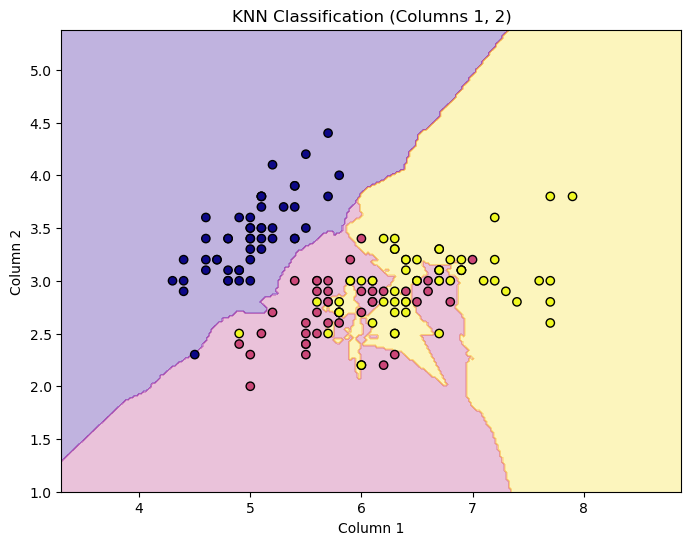

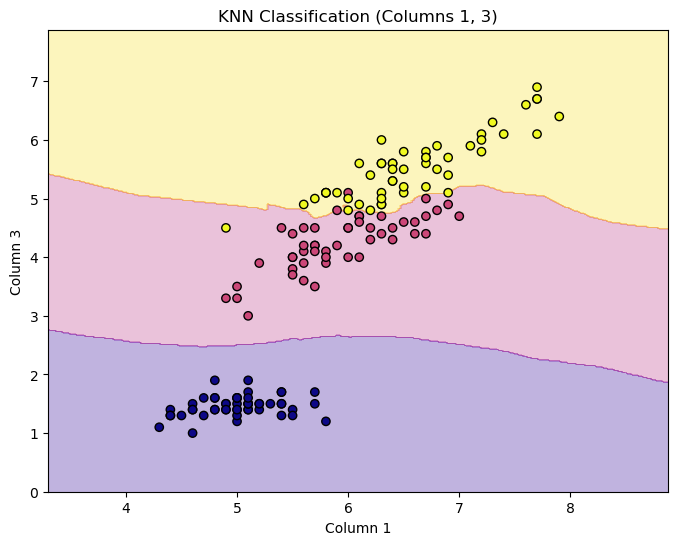

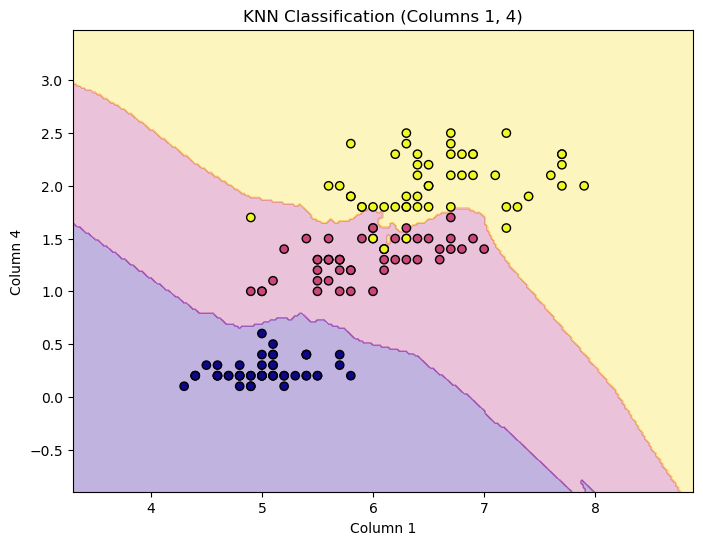

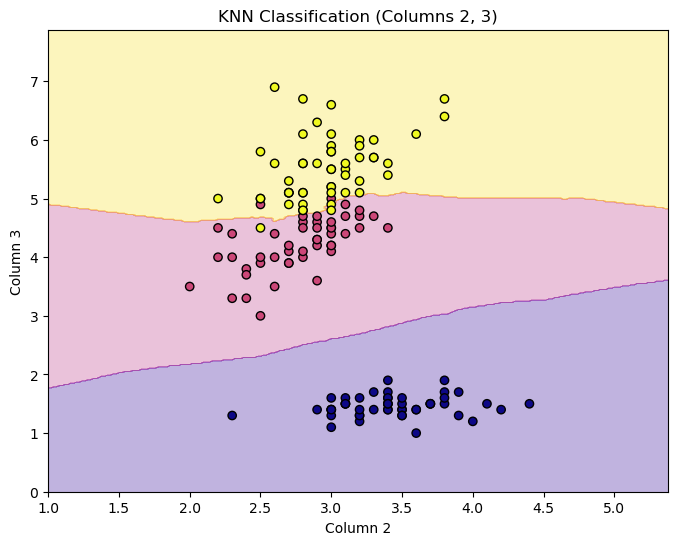

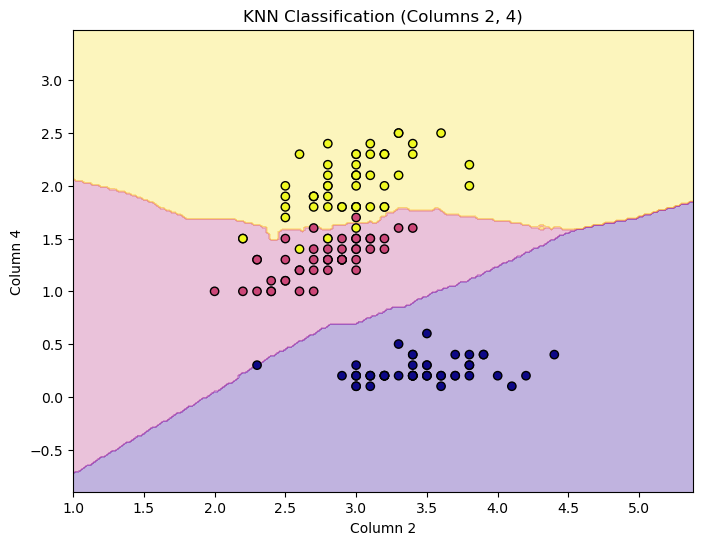

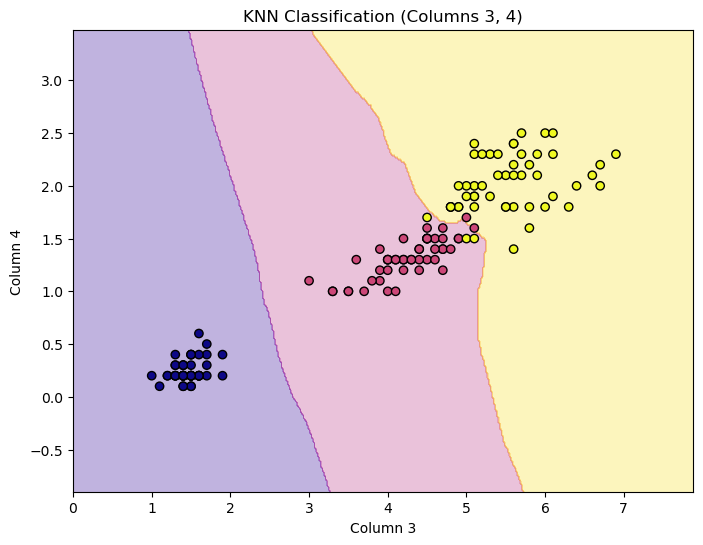

In [142]:
iris_data = datasets.load_iris()
data_X = iris_data.data
data_y = iris_data.target

pair_combinations = [(i, j) for i in range(4) for j in range(i + 1, 4)]
pair_scores = []

for pair in pair_combinations:
    X_pair = data_X[:, pair]
    
    X_train, X_test, y_train, y_test = train_test_split(X_pair, data_y, test_size=0.2, random_state=42)

    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)

    score = knn_classifier.score(X_test, y_test)
    pair_scores.append(score)

    step_size = .02
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.3)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=data_y, cmap=plt.cm.plasma, edgecolors='k')
    plt.title(f'KNN Classification (Columns {pair[0] + 1}, {pair[1] + 1})')
    plt.xlabel(f'Column {pair[0] + 1}')
    plt.ylabel(f'Column {pair[1] + 1}')
    plt.show()


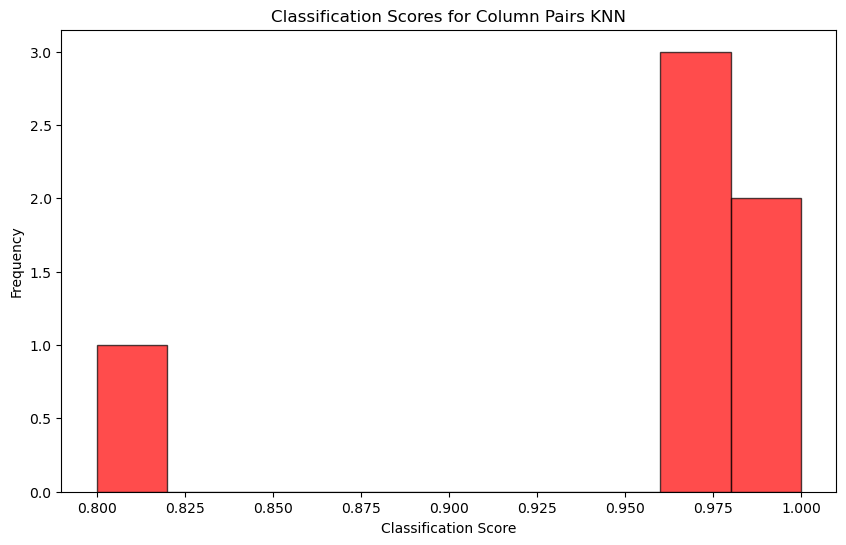

best column with highest classification score is: (1, 3)


In [143]:

plt.figure(figsize=(10, 6))
plt.hist(pair_scores, bins=10, color='red', edgecolor='black', alpha=0.7)
plt.title('Classification Scores for Column Pairs KNN')
plt.xlabel('Classification Score')
plt.ylabel('Frequency')
plt.show()

best_column_pair = pair_combinations[pair_scores.index(max(pair_scores))]
print(f'best column with highest classification score is: {best_column_pair}')


 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 6: Missing Values (5pts)</center> </font>
 <hr color="green" size=10> 

 In a markdown cell discuss:
 * the simplest command in `Pandas` for dropping missing values in a dataframe,
 * why that is not always the best approach: what can go wrong with simply dropping rows with missing values?
 * what does "missingness" refer to? 
 * what are the main types of missingness?
  * types/names?
  * which type is the most troublesome, and why?
* how do you repair missingness?
* we did missingness before we discussed `sklearn` in detail - are there useful libraries in `sklearn`; if so, describe them.


 🤔
 
The simplest command in Pandas for dropping missing values in a dataframe

>The most straightforward Pandas command to handle missing values is the `dropna()` method. This function eliminates any rows that contain at least one missing value, if inplace variable is false it drops on a copy and return its.
`
dataframe.dropna(inplace=True)`


 Why Dropping Missing Values May Not Always Be Ideal

>Eliminating missing values can result in the loss of crucial information and diminish the dataset's representativeness. In scenarios where a substantial portion of the data is missing or if the absence is non-random, discarding rows can introduce bias and compromise the validity of statistical analyses.

 Meaning of "Missingness"

>"Missingness" denotes the existence of undefined or absent entries in a dataset. Missing values might occur due to various factors like errors in data entry, malfunctioning sensors, or intentional non-responses in surveys.

 Categories of Missingness

  >- **Missing Completely at Random (MCAR):** The chance of missingness is uniform across all observations.
  
 > - **Missing at Random (MAR):** The likelihood of missingness depends on observed data but not on the absent data itself.
  
  >- **Missing Not at Random (MNAR):** The likelihood of missingness relates to the missing data itself.

  MNAR tends to be the most challenging category because the missing values are linked to unobserved data. Improper handling of MNAR can lead to biased analyses and erroneous conclusions.

Strategies for handeling Missingness


>**Imputation:** Replacement of missing values with estimated or predicted values derived from observed data.

>**Deletion:** Removal of rows or columns with missing values.

>**Mean/Median/Mode Imputation:** Substitution of missing values with the mean, median, or mode of observed values.

 > **Model-Based Imputation:** Utilization of statistical models to predict missing values based on observed data.

 Handy Libraries in `sklearn` for Managing Missing Data

In scikit-learn (`sklearn`), the `SimpleImputer` class proves beneficial for imputing missing values. It offers strategies such as mean, median, most_frequent, or constant imputation.

`imputer = SimpleImputer(strategy='mean')`


 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 7: Visualization (5pts)</center> </font>
 <hr color="green" size=10>

Follow these steps:
 * read in the penguins dataset,
 * pick two features,
 * make a scatterplot of one feature value versus the other,
 * choose a marker that represents the island,
 * draw the readers attention to one type of penguin, with the others "in the background",
 * do all of this using all four: `Seaborn`, `Plotly`, `matplotlib` and `Altair`,
 * describe the grammar of graphics in this context.  

In [144]:
penguins = sns.load_dataset('penguins')
penguins.columns
col1 = 'flipper_length_mm'
col2 = 'body_mass_g'


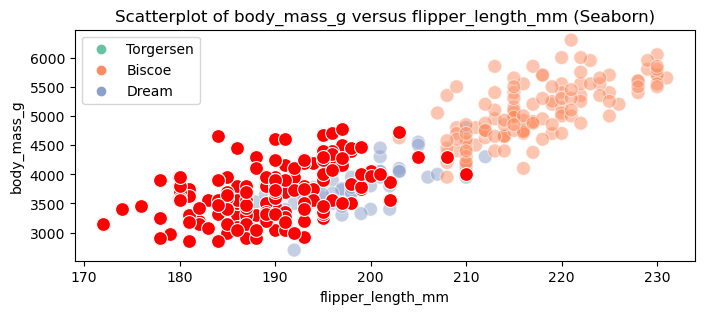

In [145]:
#Seaborn
plt.figure(figsize=(8, 3))
sns.scatterplot(data=penguins, x=col1, y=col2, hue='island', palette='Set2', marker='o', s=100, alpha=0.5)
sns.scatterplot(data=penguins[penguins['species'] == 'Adelie'], x=col1, y=col2, color='red', marker='o', s=100)
plt.title(f'Scatterplot of {col2} versus {col1} (Seaborn)')
plt.show()


In [146]:
#Plotly
fig = px.scatter(penguins, x=col1, y=col2, color='island', symbol='species', opacity=0.6, size_max=15)
fig.update_layout(title=f'Scatterplot of {col2} versus {col1} (Plotly)')
fig.show()

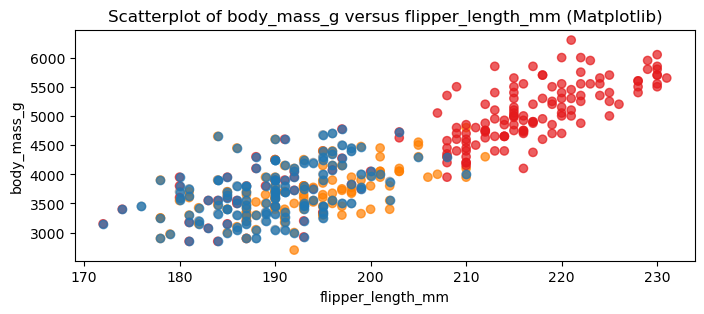

In [147]:
plt.figure(figsize=(8, 3))
plt.scatter(penguins[col1], penguins[col2], c=penguins['island'].astype('category').cat.codes, cmap='Set1', alpha=0.7)
plt.scatter(penguins[penguins['species'] == 'Adelie'][col1], penguins[penguins['species'] == 'Adelie'][col2], alpha=0.7)
plt.title(f'Scatterplot of {col2} versus {col1} (Matplotlib)')
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

In [148]:
#Altair
alt.Chart(penguins).mark_circle(size=100, opacity=0.7).encode(
    x=alt.X(col1, title=col1),
    y=alt.Y(col2, title=col2),
    color='island:N',
    tooltip='species'
).properties(
    title=f'Scatterplot of {col2} versus {col1} (Altair)'
).interactive()

alt.Chart(...)

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 8: Multivariate Gaussian and Simpson's Paradox (5pts)</center> </font>
 <hr color="green" size=10> 

In this problem you will illustrate Simpson's Paradox with multivariate Gaussians. Follow these steps:

1. read in the penguin dataset,
2. make a scatterplot with bill depth versus bill length,
3. find the covariance matrix and mean of:
  * Adele portion,
  * Chinstrap portion,
  * Gentoo portion,
  * all portions combined.
4. what is the equation of a multivariate Gaussian (MVG) in terms of these covariances and means? 
5. what are the contours of a MVG, and how do you plot that shape?
6. add to your scatterplot contours for the four cases,
7. discuss how this illustrates Simpson's Paradox. 


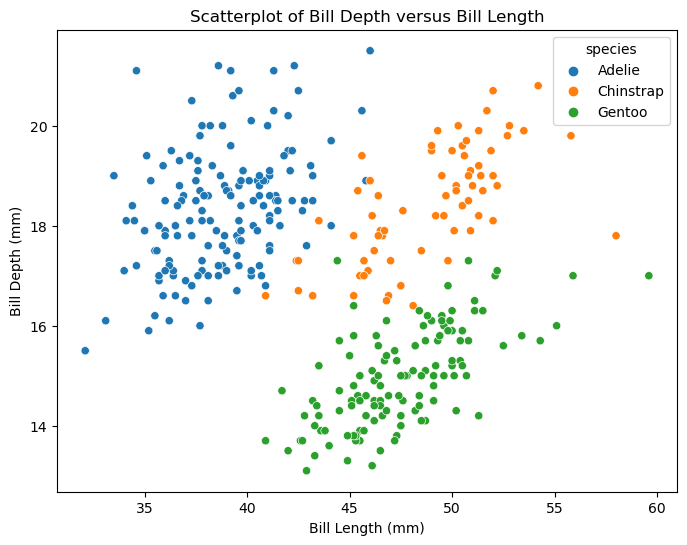

Covariance of gentoom adele,chistrap                  bill_length_mm  bill_depth_mm
bill_length_mm        9.497845       1.945580
bill_depth_mm         1.945580       0.962792                 bill_length_mm  bill_depth_mm
bill_length_mm        7.093725       1.268602
bill_depth_mm         1.268602       1.480237                 bill_length_mm  bill_depth_mm
bill_length_mm       11.150630       2.477801
bill_depth_mm         2.477801       1.289122
,Mean of gentoom adele,chistrap  bill_length_mm    47.504878
bill_depth_mm     14.982114
dtype: float64 bill_length_mm    38.791391
bill_depth_mm     18.346358
dtype: float64 bill_length_mm    48.833824
bill_depth_mm     18.420588
dtype: float64


In [149]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatterplot of Bill Depth versus Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

adele = penguins[penguins['species'] == 'Adelie']
chinstrap = penguins[penguins['species'] == 'Chinstrap']
gentoo = penguins[penguins['species'] == 'Gentoo']

cv_gentoo = gentoo[['bill_length_mm', 'bill_depth_mm']].cov()
cv_adele = adele[['bill_length_mm', 'bill_depth_mm']].cov()
cv_chinstrap = chinstrap[['bill_length_mm', 'bill_depth_mm']].cov()


mn_adele = adele[['bill_length_mm', 'bill_depth_mm']].mean()
mn_chinstrap = chinstrap[['bill_length_mm', 'bill_depth_mm']].mean()
mn_gentoo = gentoo[['bill_length_mm', 'bill_depth_mm']].mean()



cv_combined = penguins[['bill_length_mm', 'bill_depth_mm']].cov()
mn_combined = penguins[['bill_length_mm', 'bill_depth_mm']].mean()



print('Covariance of gentoom adele,chistrap ',cv_gentoo,cv_adele,cv_chinstrap)
print(',Mean of gentoom adele,chistrap ',mn_gentoo,mn_adele,mn_chinstrap)



4 )PDF of a MVG distribution is

$$ f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k \det(\Sigma)}} \exp\left(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu})\right) $$


$$k$$ is the dimensionality of the data,
$$\mathbf{x}$$ is the data vector,
$$\mathbf{\mu}$$ is the mean vector,
$$\Sigma$$ is the covariance matrix.

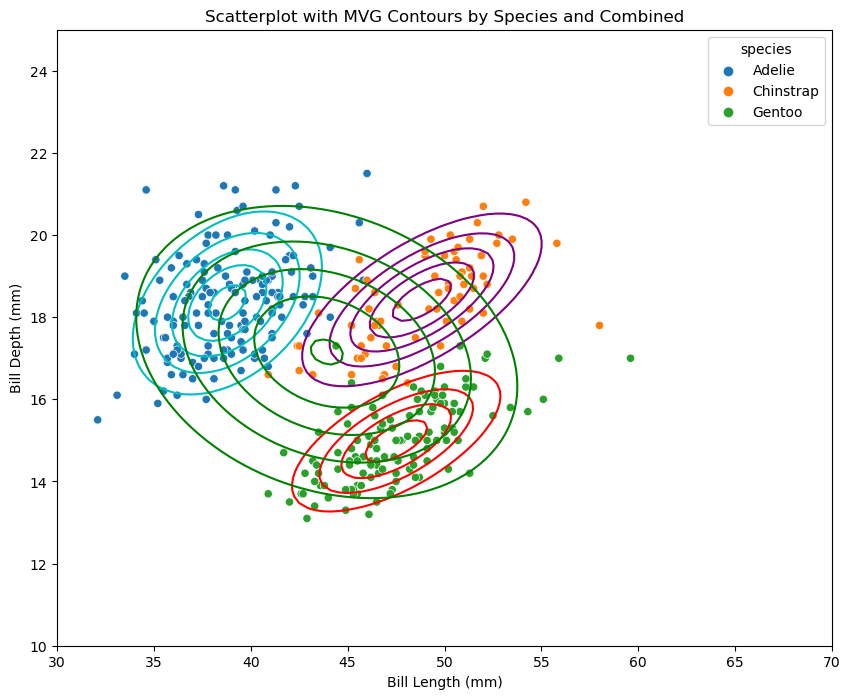

In [150]:
# 5)MVG and Scatter Plot

x_vals, y_vals = np.meshgrid(np.linspace(30, 70, 100), np.linspace(10, 25, 100))
positions = np.dstack((x_vals, y_vals))


adele_mvg = multivariate_normal(mean=mn_adele, cov=cv_adele)
adele_contour = adele_mvg.pdf(positions)


chinstrap_mvg = multivariate_normal(mean=mn_chinstrap, cov=cv_chinstrap)
chinstrap_contour = chinstrap_mvg.pdf(positions)


gentoo_mvg = multivariate_normal(mean=mn_gentoo, cov=cv_gentoo)
gentoo_contour = gentoo_mvg.pdf(positions)


combined_mvg = multivariate_normal(mean=mn_combined, cov=cv_combined)
combined_contour = combined_mvg.pdf(positions)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.contour(x_vals, y_vals, adele_contour, levels=5, colors='c')
plt.contour(x_vals, y_vals, chinstrap_contour, levels=5, colors='purple')
plt.contour(x_vals, y_vals, gentoo_contour, levels=5, colors='red')
plt.contour(x_vals, y_vals, combined_contour, levels=5, colors='green')
plt.title('Scatterplot with MVG Contours by Species and Combined')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


 🤔
 
Simpson's Paradox manifests when a pattern emerges within distinct data subsets but vanishes or reverses when these subsets are amalgamated. Within this context, individual species (Adele, Chinstrap, Gentoo) might showcase certain trends within the scatterplot. However, upon consolidation, the overarching trend may diverge.

Utilizing MVG contours aids in visualizing the data distribution for each species and the combined dataset. Simpson's Paradox becomes apparent when the correlation between bill length and bill depth differs between examining each species independently and considering all species collectively. This evaluation involves scrutinizing the orientation and configuration of the contours for each species alongside the combined dataset.

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 9: SVD (5pts)</center> </font>
 <hr color="green" size=10> 

 Answer these questions:
 1. what is the difference between an inner and outer product? what libraries are available for these in Python?
 2. for a vector ${\bf x}$, what is the difference in shape between ${\bf x}^T{\bf x}$ and ${\bf x}{\bf x}^T$?
 3. derive this equation from the SVD:
  $$X = \sum_{i=1}^r \sigma_i {\bf u}_i {\bf v}_i^T ,$$
 4. read in the penguins data and form a 4-column data matrix $X$ from the measurements,
 5. make a scatterplot of the first and third columns,
 6. find the SVD of $X$ and evaluate the expression above for $i=1$,
 7. make a scatterplot of the first and third columns for this rank-one approximation,
 8. describe how well a rank-one approximation approximates the original data; what if you keep two terms in the sum?  

  🤔
  

 Inner and Outer Products

**Inner Product:**
The inner product, also termed as the dot product, involves an operation between two vectors, yielding a scalar. For vectors $ \mathbf{a} $ and $ \mathbf{b} $, the inner product $ \mathbf{a} \cdot \mathbf{b} $ computes as $ \sum_{i=1}^{n} a_i \cdot b_i $, where $ n $ denotes the vectors' dimensionality. In Python, NumPy offers `np.dot()` or `np.inner()` for inner product calculations.

**Outer Product:**
The outer product of two vectors generates a matrix. For vectors $ \mathbf{a} $ and $ \mathbf{b} $, the outer product $ \mathbf{a} \otimes \mathbf{b} $ results in $ \mathbf{ab}^T $, creating a matrix. In Python, NumPy's `np.outer()` facilitates outer product computations.

Variation in Shapes
For a vector $ \mathbf{x} $, $ \mathbf{x}^T\mathbf{x} $ yields a scalar with a shape of (1, 1). Conversely, $ \mathbf{x}\mathbf{x}^T $ produces a square matrix, shaped (n, n), where $ n $ represents the dimensionality of $ \mathbf{x} $.


Derivation of SVD Equation
*Singular Value Decomposition (SVD):*

For a matrix $X$ of dimensions $m \times n$, it is

$$ X = U \Sigma V^T $$

where:
 $U$ is an $m \times m$ orthogonal matrix (containing left singular vectors).
 $\Sigma$ is an $m \times n$ diagonal matrix, encompassing singular values $\sigma_1, \sigma_2, \ldots, \sigma_r$ along its diagonal (non-negative and in decreasing order).
 $V$ is an $n \times n$ orthogonal matrix (comprising right singular vectors).

*Derivation:*

The equation $ X = U \Sigma V^T $ arises from the decomposition of $X$ utilizing its SVD:

$$ X = \sum_{i=1}^r \sigma_i \mathbf{u}_i (\mathbf{v}_i)^T $$

where:
 $$\mathbf{u}_i$$ the $i$-th column of $U$,
 $$\mathbf{v}_i$$ the $i$-th column of $V$,
 $$\sigma_i$$ the $i$-th singular value.

Each term in the sum $\sigma_i \mathbf{u}_i (\mathbf{v}_i)^T$ constitutes a rank-one matrix. The summation over $i$ consolidates these rank-one matrices to reconstruct the original matrix $X$ based on its SVD. Therefore, the provided equation directly stems from expressing $X$ as a sum of rank-one matrices through its SVD representation.

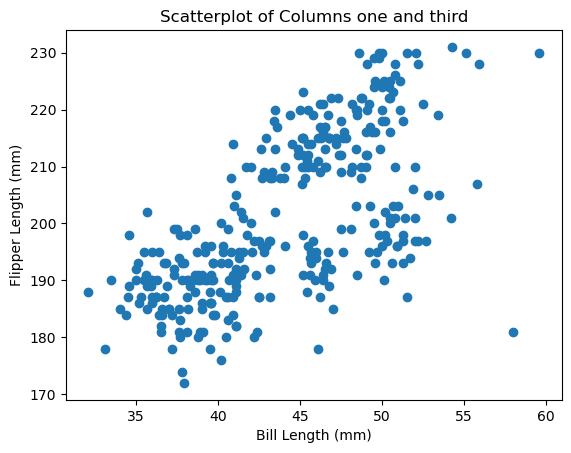

In [151]:
penguins=penguins.dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values

plt.scatter(X[:, 0], X[:, 2])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatterplot of Columns one and third')
plt.show()


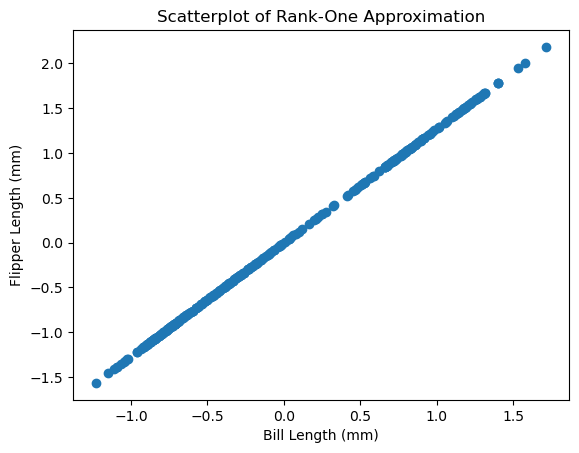

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)


i = 0
approximation = S[i] * np.outer(U[:, i], VT[i, :])

plt.scatter(approximation[:, 0], approximation[:, 2])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatterplot of Rank-One Approximation')
plt.show()

 🤔
A rank-one approximation encapsulates the most dominant singular value alongside its related singular vectors, portraying a one-dimensional structure within the dataset. When visualized in a scatterplot, the rank-one approximation manifests as points aligned along a line, indicating this one-dimensional structure. If you opt for two terms in the sum (\(i = 2\)), it captures two-dimensional structures. Including more terms progressively refines the approximation, approaching closer to the original dataset. To evaluate the approximation's quality, compare the scatterplots and compute the Frobenius norm of the disparity between \(X\) and its approximation.

 <hr color="green" size=10> 

### <font color='magenta' > <center>Problem 10: DS and ML (5pts)</center> </font>
 <hr color="green" size=10> 

 In a markdown cell, define these terms in detail (a short paragraph for each, including details and examples):
 * data,
 * science,
 * data science,
 * big data,
 * machine learning,
 * supervised learning,
 * unsupervised learning,
 * in what way can we think of DS as its own topic, separate from ML? or, are DS and ML one and the same?

 🤔
 
> **Data:**
   Data is the raw information, observations, or measurements that are gathered, documented, and subject to analysis. Its forms can vary, encompassing numerical values, textual details, visual content like images, and more.

**Illustrations:** Temperature recordings, demographic profiles of users, or sales statistics.

 >**Science:**  Science signifies a systematic pursuit that assembles and structures knowledge by formulating hypotheses and predictions about the natural world, subject to testing. This field involves observations, experiments, and the development of theories to explain natural phenomena.
 
**Example:** Fields such as biology, chemistry, and social sciences.

>**Data Science:**  Data Science constitutes an interdisciplinary domain utilizing scientific methodologies, algorithms, and systems to glean insights and wisdom from both structured and unstructured data. It amalgamates expertise from statistics, computer science, domain-specific knowledge, and analytical techniques to derive valuable information aiding decision-making processes.

**Instances:** Analyzing customer buying patterns to refine marketing strategies.

 >**Big Data:** Big Data denotes extensive and intricate datasets whose handling might challenge traditional data processing tools due to their sheer scale and complexity. These datasets are characterized by three fundamental aspects: volume (large data volumes), velocity (rapid data generation), and variety (diverse data types).

**Exemplifications:** Analyzing global social media interactions.

> **Machine Learning:** Machine Learning, a subset of artificial intelligence, centers on developing algorithms and models enabling computers to discern patterns and generate predictions or decisions autonomously, devoid of explicit programming. It involves training models on data to enhance their performance iteratively.
 
 **Instances:** Training a model to recognize handwritten digits.

 > **Supervised Learning:** Supervised Learning, within machine learning, involves algorithms trained on labeled datasets, where input data correlates with corresponding output labels. Through training, the algorithm learns to map input features to the correct output.

**Illustrations:** Image classification, associating images with specific categories.

> **Unsupervised Learning:** Unsupervised Learning, a machine learning paradigm, tasks algorithms with unlabeled data, challenging them to discern inherent patterns or structures independently. Tasks such as clustering and dimensionality reduction fall under unsupervised learning.

**Illustrations:** Clustering data points without predefined labels.

> **Data Science vs. Machine Learning:** Data Science and Machine Learning are interrelated yet distinct concepts. Data Science encompasses a wider spectrum of activities, including data preprocessing, exploration, and interpretation, while Machine Learning specifically concentrates on crafting algorithms capable of learning from data to make predictions. Data Science encompasses facets beyond predictive modeling.